___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



from sklearn.cluster import KMeans
#from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, complete, average
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pyclustertend import hopkins


import scipy.cluster.hierarchy as sch
#from sklearn.cluster import AffinityPropagation
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")


#plt.rcParams["figure.figsize"] = (10,6)
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\solid\OneDrive\Desktop\SDA - ML\Project 3\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(columns="CustomerID", inplace=True)
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(200, 4)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





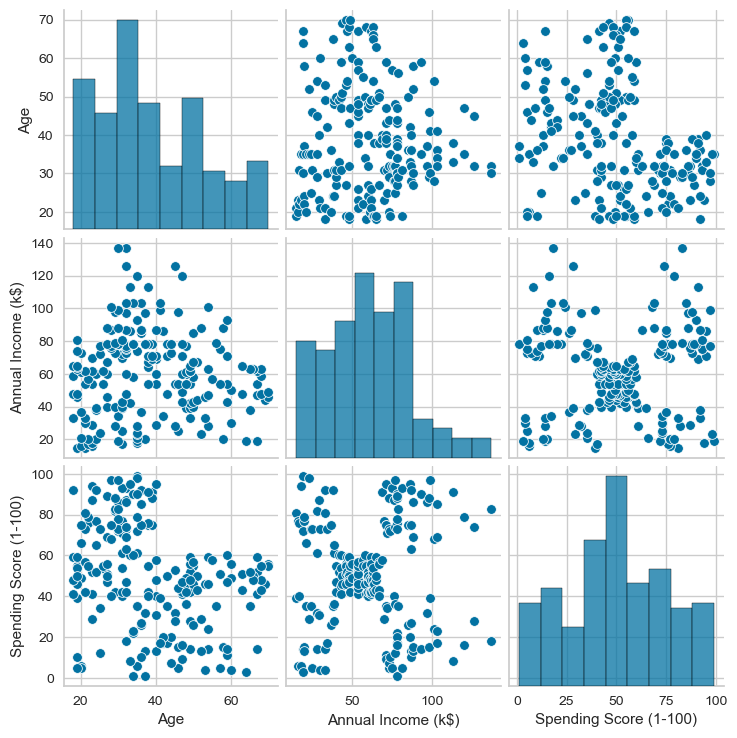

In [9]:
sns.pairplot(df)
plt.show()

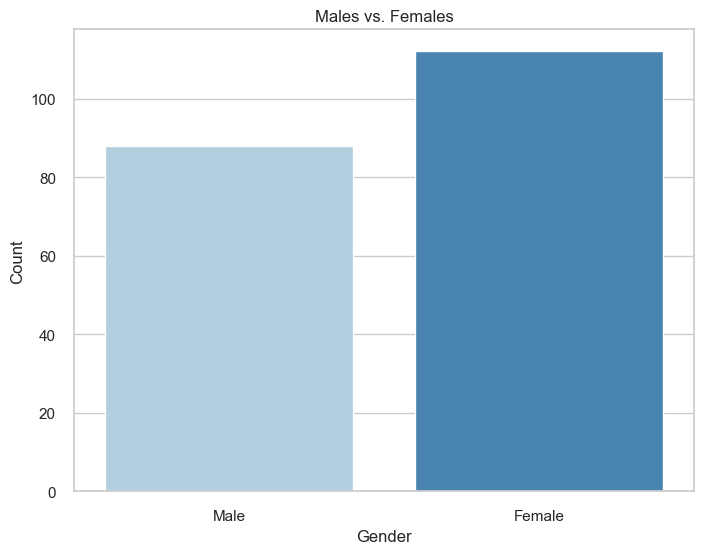

In [10]:

sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='Gender', data=df, palette="Blues")  

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Males vs. Females')


plt.show()

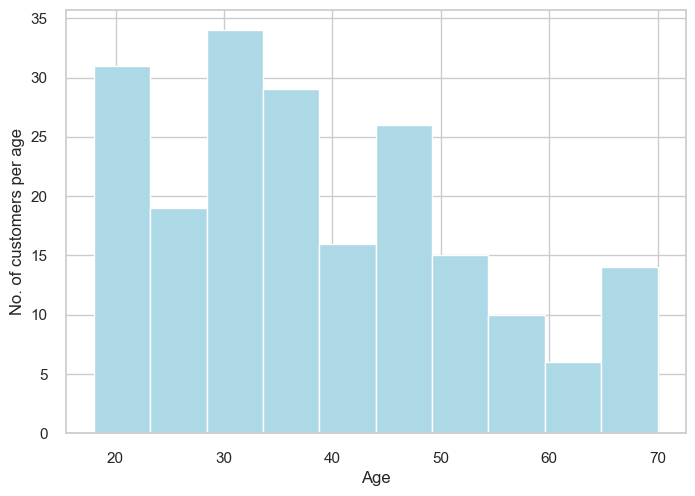

In [11]:

plt.hist(x=df['Age'], bins=10, orientation='vertical', color='lightblue')
plt.xlabel('Age')
plt.ylabel('No. of customers per age')
plt.show()

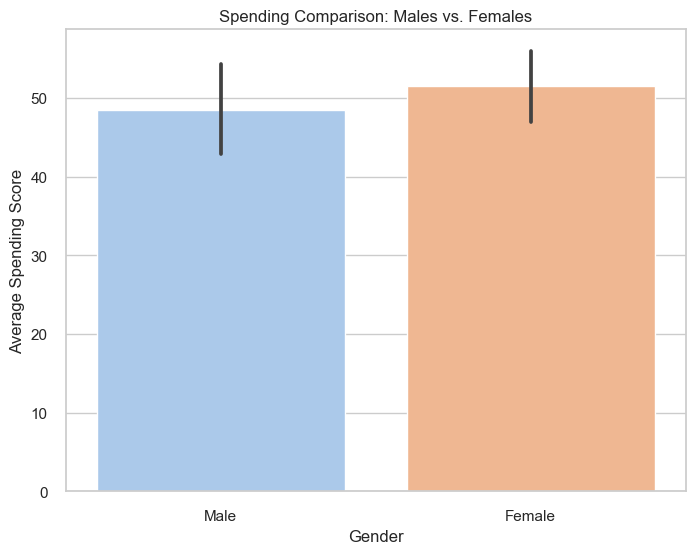

In [12]:
# Who spends more? Males or Females? 
plt.figure(figsize=(8, 6))  

sns.barplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')  # Use 'pastel' palette for a light color
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Spending Comparison: Males vs. Females')

plt.show()

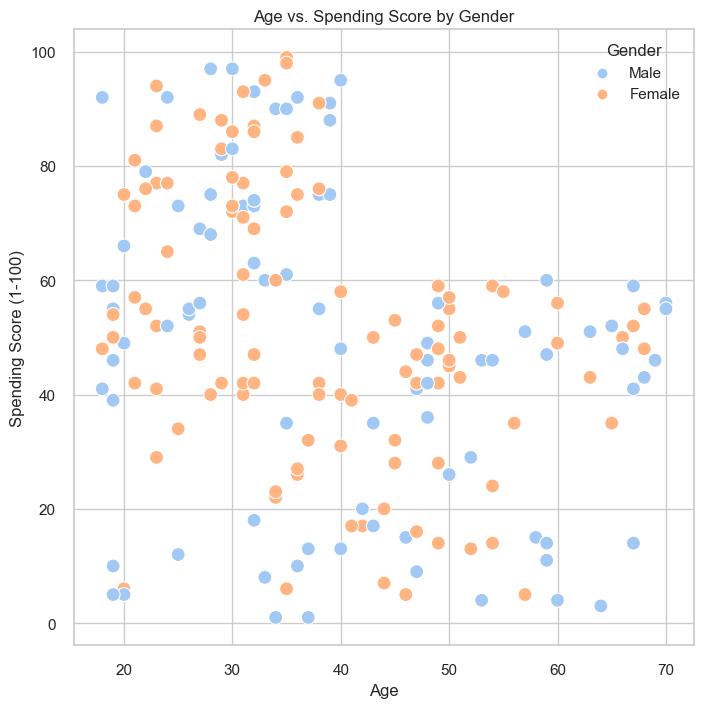

In [13]:
plt.figure(figsize=(8, 8))  

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='pastel', s=100)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score by Gender')

plt.legend(title='Gender')
plt.show()

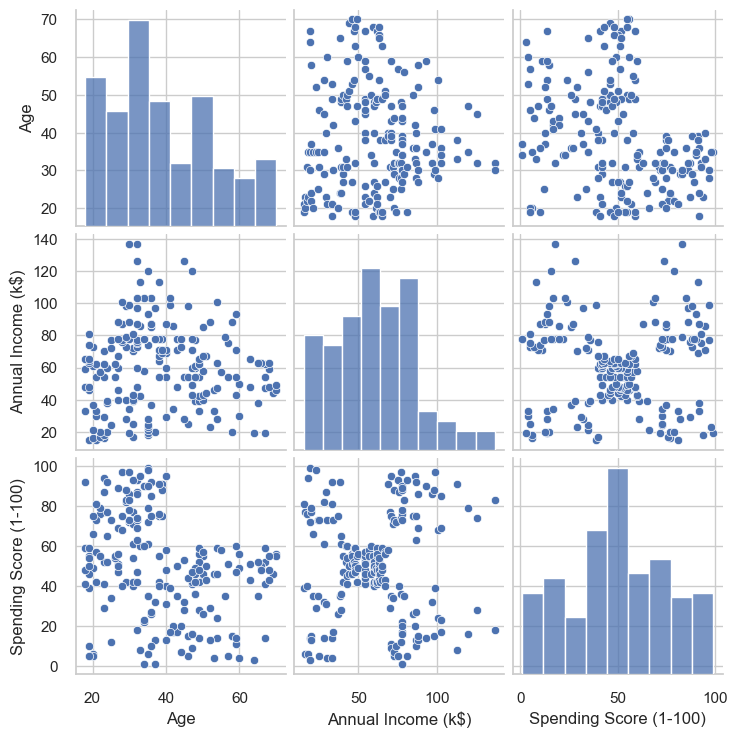

In [14]:
sns.pairplot(df);

In [15]:
clust_seg = df[['Annual Income (k$)', 'Spending Score (1-100)']]

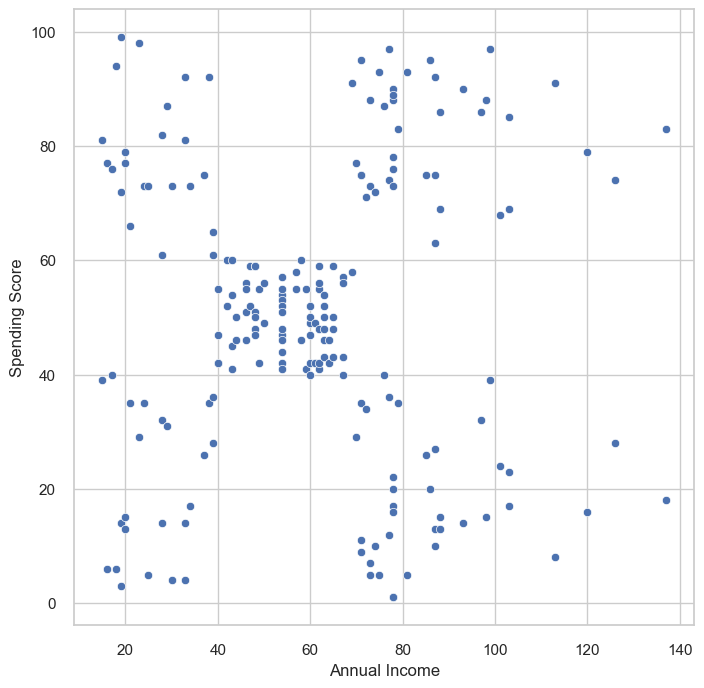

In [16]:

plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = clust_seg)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

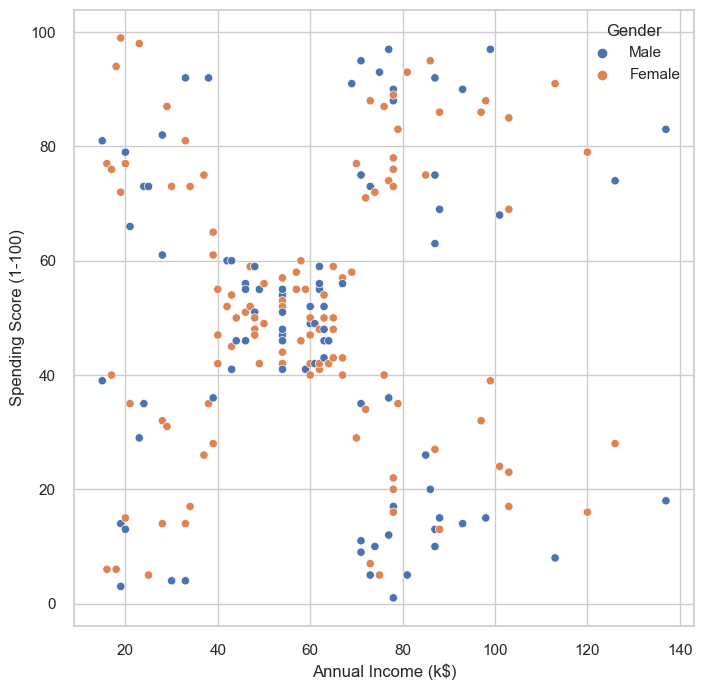

In [17]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue="Gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [18]:
# Dropping categorical data
df2 = df.drop(columns="Gender")

In [19]:
# Using the formula used in ML-18 to the find the hopkins score, and it's tendcy to cluster
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from pyclustertend import hopkins
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [20]:
hopkins(df2, 1)


0.6899509268666193

In [21]:
# Choosing 2 variables 
X= df.loc[:,['Age','Spending Score (1-100)']]  
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [22]:
#hopkins(X, X.shape[0])

#### *ii. Determine optimal number of clusters*

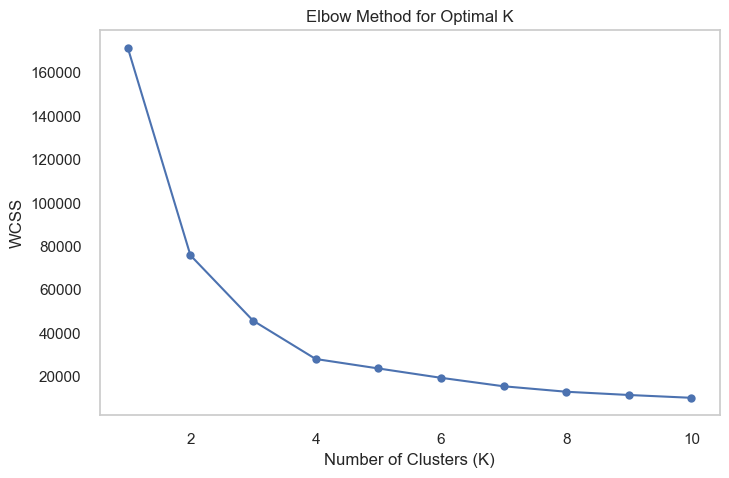

In [23]:
wcss = []  

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


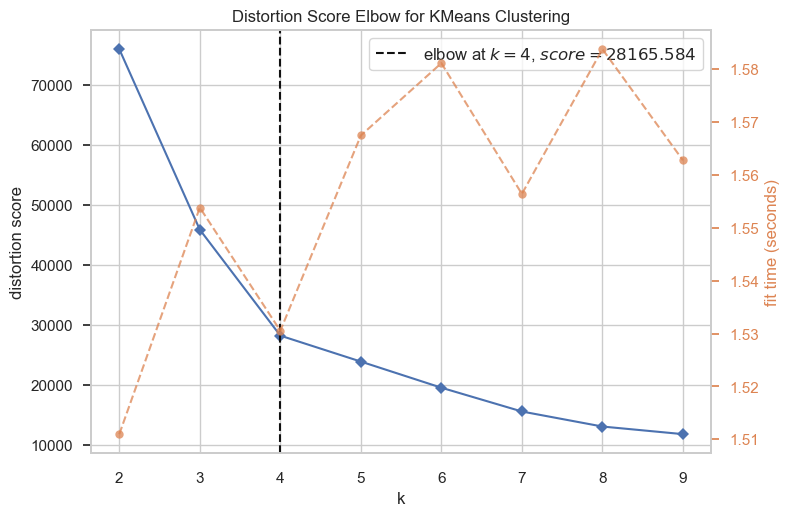

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [25]:
# Finding silhouette_score

from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


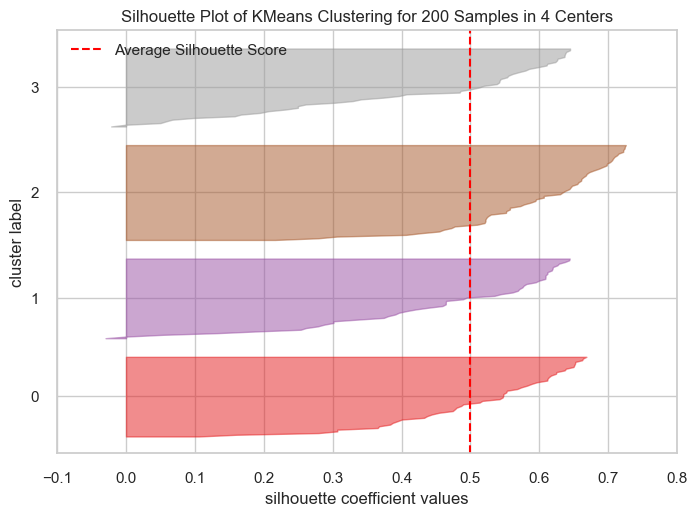

In [26]:
# Now we will visulize silhouette scores for the 4 clusters 
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)   
visualizer.poof();

In [27]:
#old code
#from sklearn.preprocessing import StandardScaler


#df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
#df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled_features

# Display the preprocessed data
#print(df_encoded.head())




#### *iii. Apply K Means*

In [28]:
# Based on the elbow method we will choose K=4
kmeans = KMeans(n_clusters = 4, random_state=42)

In [29]:
X["cluster_Kmeans"] = kmeans.fit_predict(X)
X

,Age,Spending Score (1-100),cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

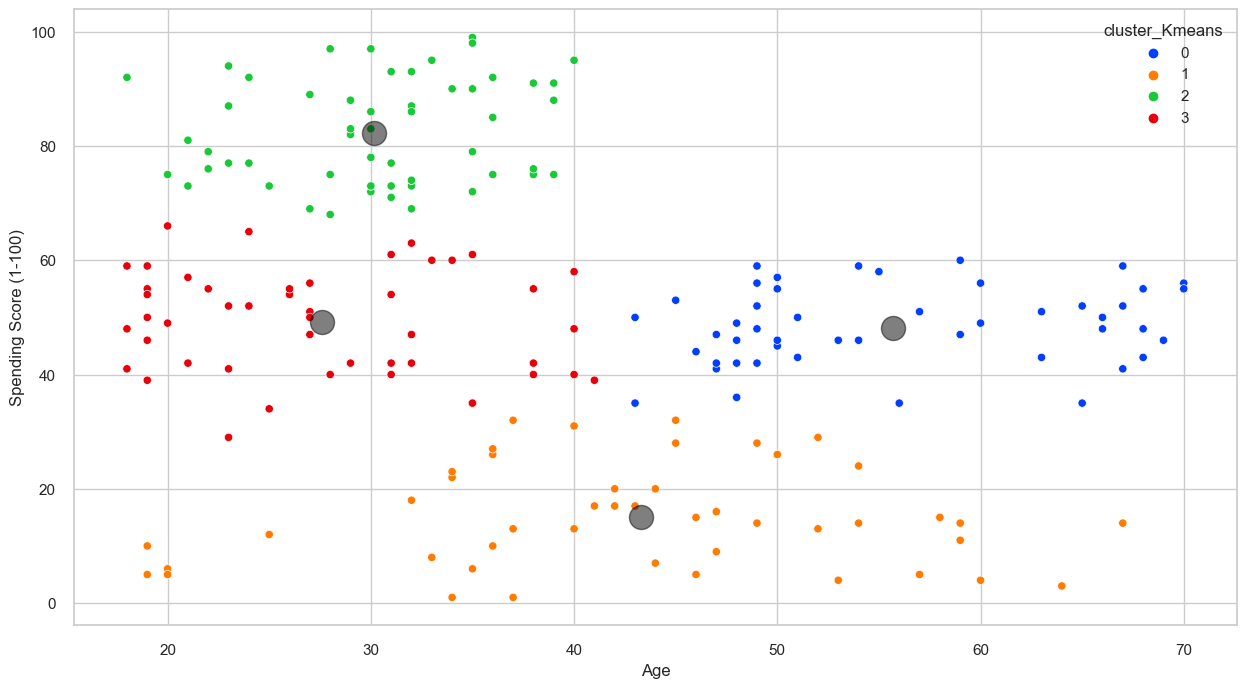

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Kmeans', data=X, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Why silhouette_score is negative?

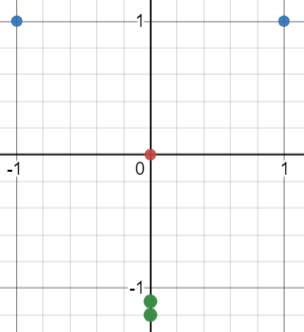

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [31]:
X1 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]   
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
hopkins(X1,1)

0.7047904700708678

#### *ii. Determine optimal number of clusters*

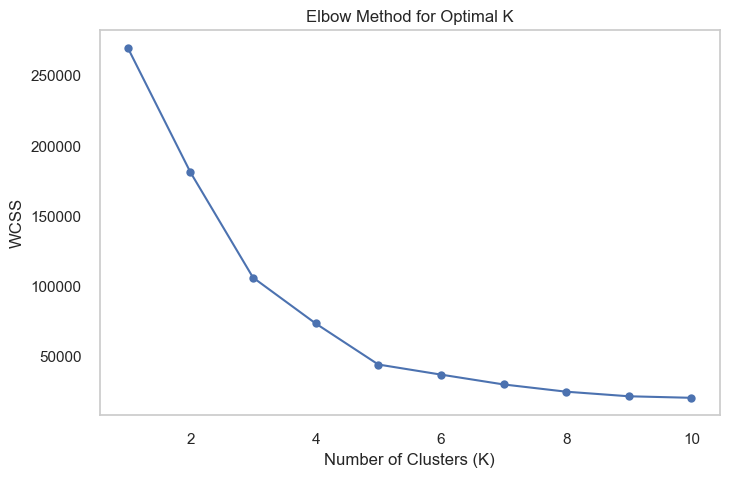

In [33]:
wcss = []  

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


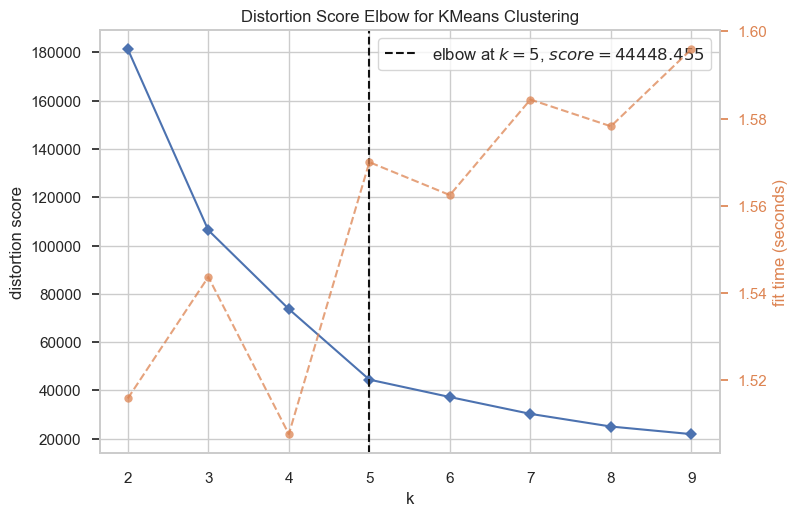

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [35]:
# Finding silhouette_score

from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


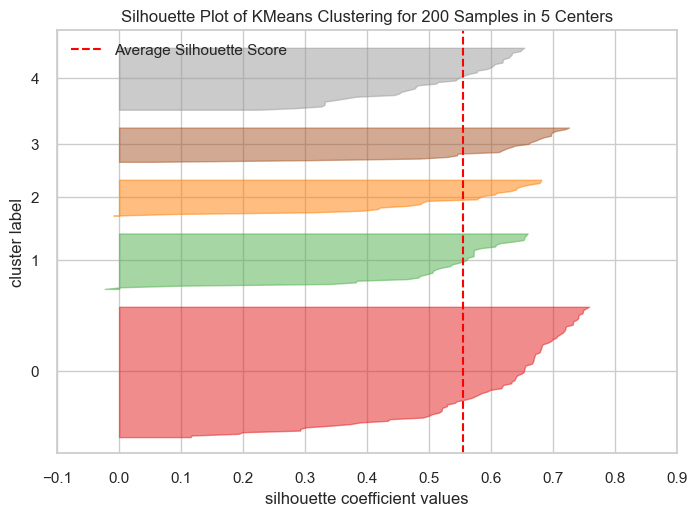

In [36]:
# Now we will visulize silhouette scores 

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model2 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(X1)   
visualizer.poof();

#### *iii. Apply K Means*

In [37]:
# We will choose K=5

kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [38]:
X1['cluster_Kmeans'] = kmeans2.fit_predict(X1)
X1

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

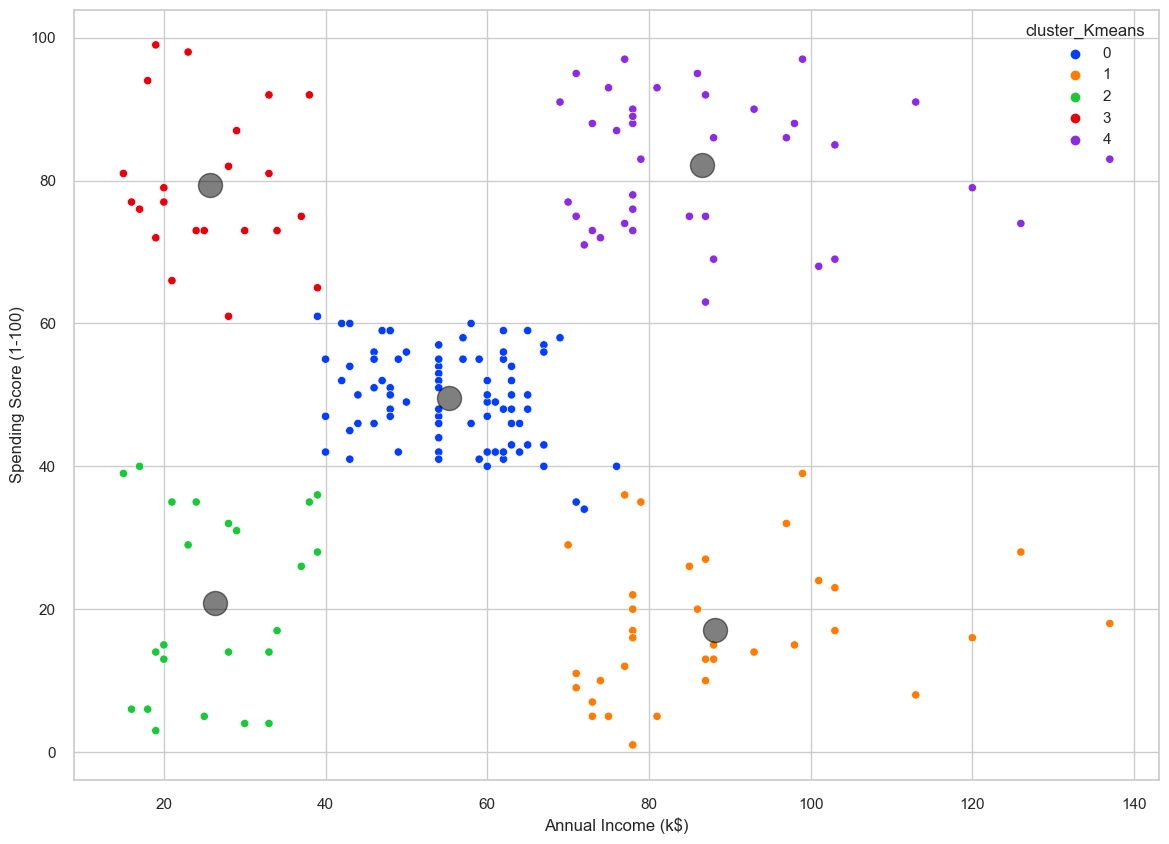

In [39]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [40]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

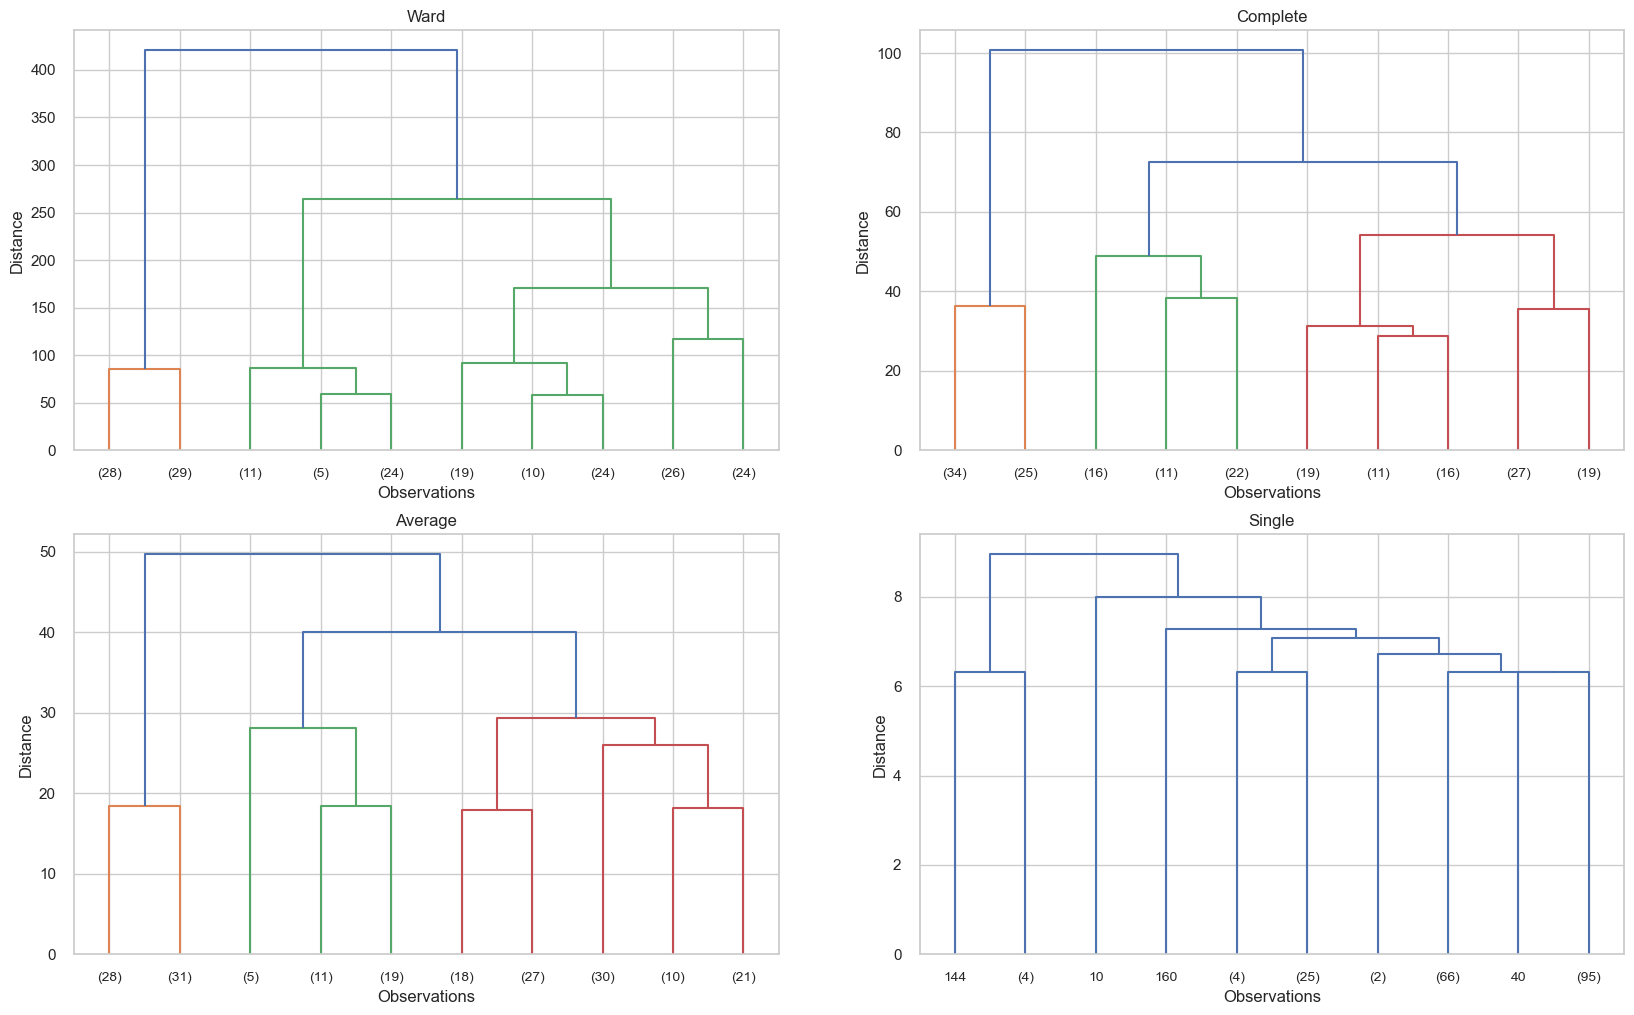

In [41]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

#### Age and Spending Score- x1

In [42]:
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.45437524400798707
Silhouette Score for 3 clusters: 0.4403939907045589
Silhouette Score for 4 clusters: 0.4605877438219549
Silhouette Score for 5 clusters: 0.4039101313348303
Silhouette Score for 6 clusters: 0.4122277010437696
Silhouette Score for 7 clusters: 0.4154024433868577
Silhouette Score for 8 clusters: 0.387772181711837
Silhouette Score for 9 clusters: 0.39419016298118076


## Clustering based on Annual Income and Spending Score- x2

#### Annual Income and Spending Score- x2

In [43]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

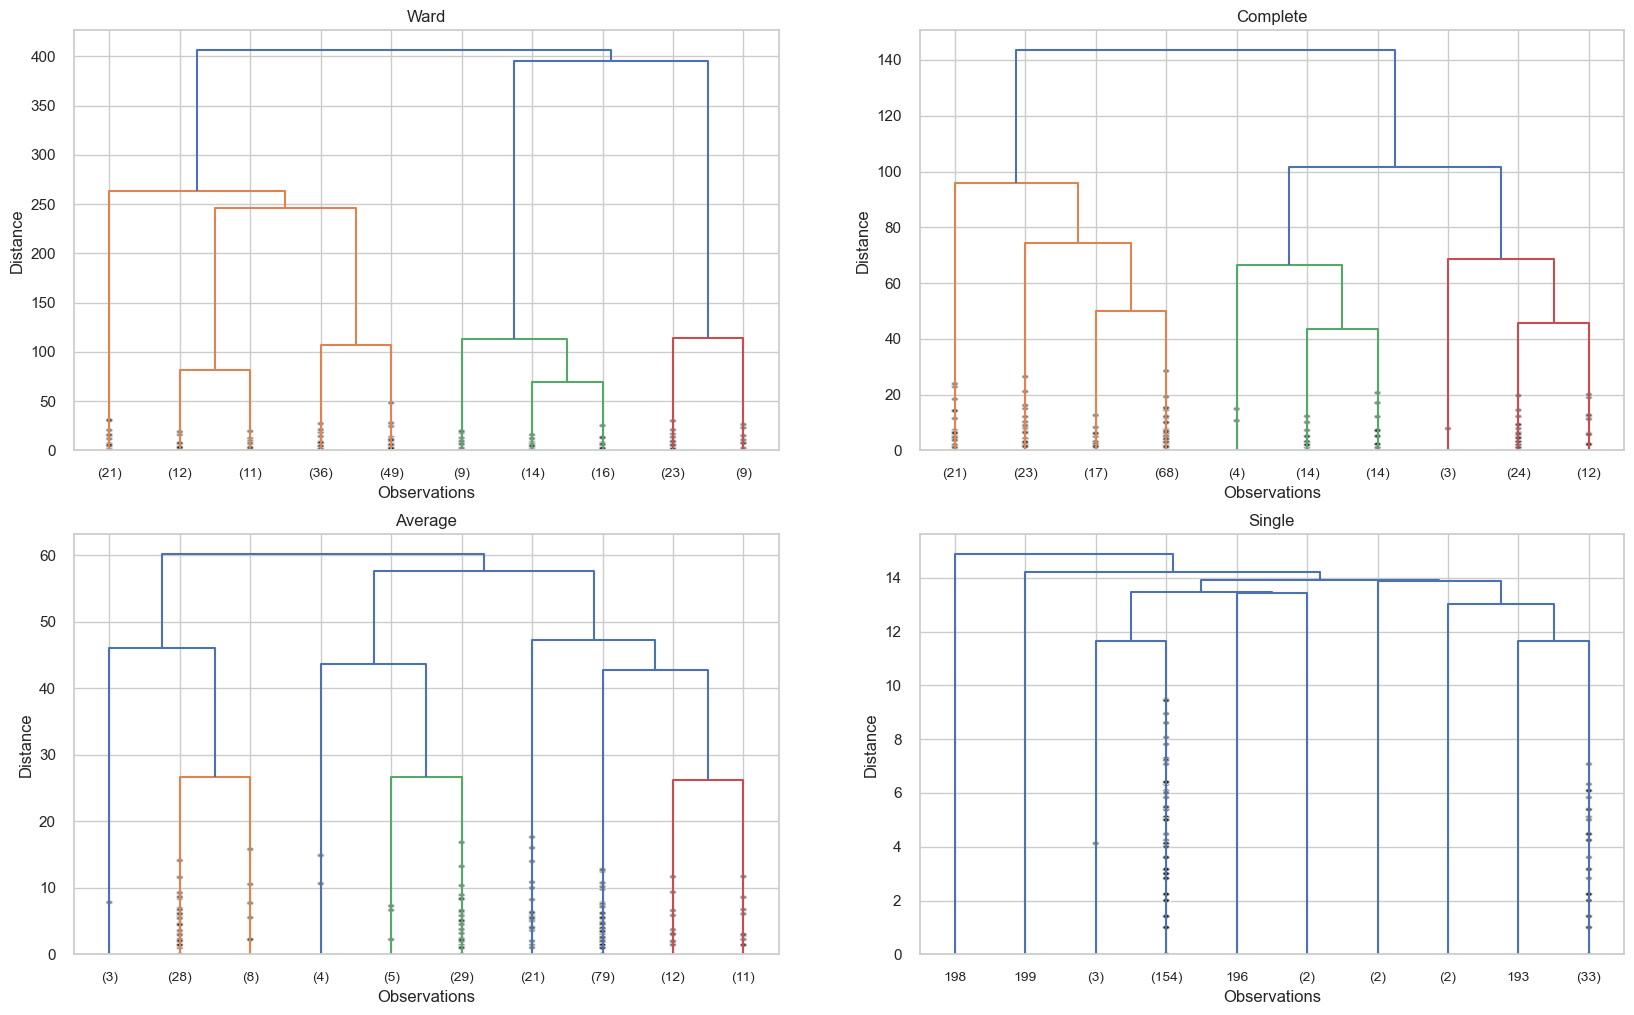

In [44]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [45]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [46]:
# No. of K we knew from dendogram
model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
clusters = model.fit_predict(X)

In [47]:
X["clusters"] = clusters
X.head()

,Age,Spending Score (1-100),cluster_Kmeans,clusters
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [48]:
model2 = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
clusters = model2.fit_predict(X1)

In [49]:
X1["clusters"] = clusters
X1.head()

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,clusters
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters*

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

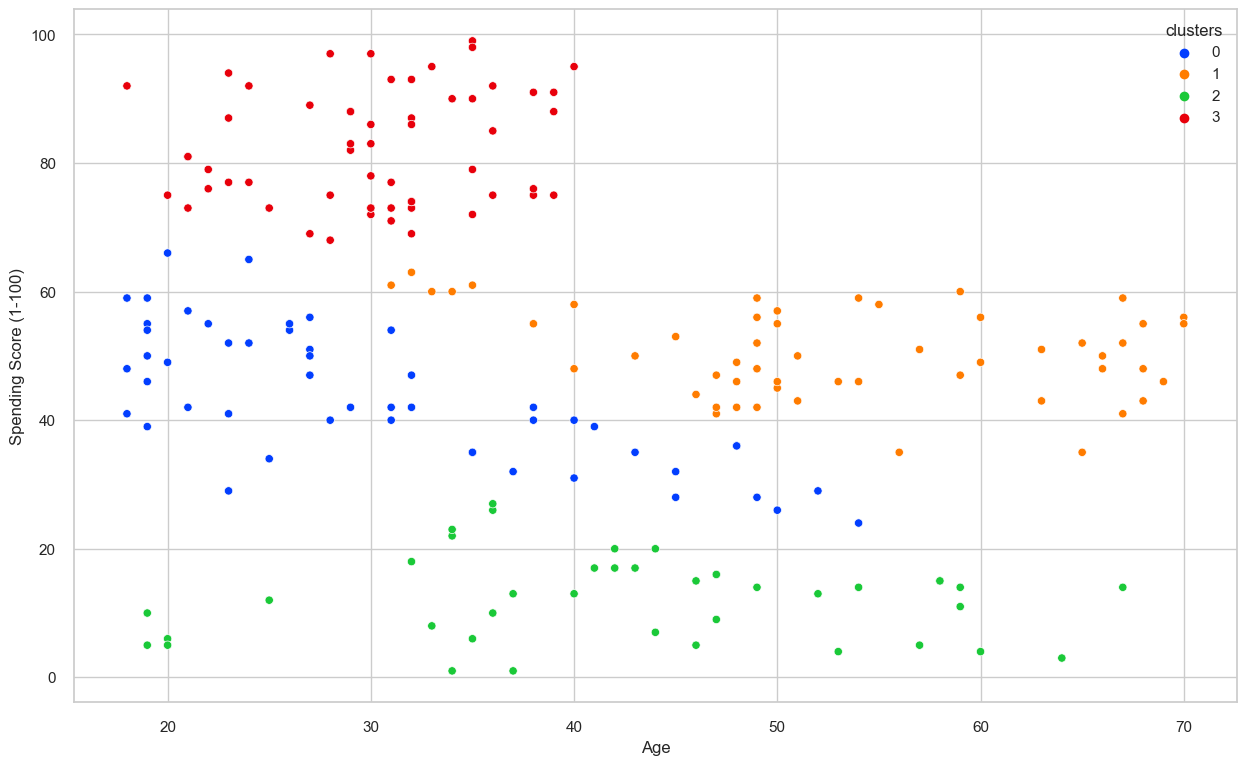

In [50]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=X, palette="bright")

Text(0.5, 1.0, 'Clusters')

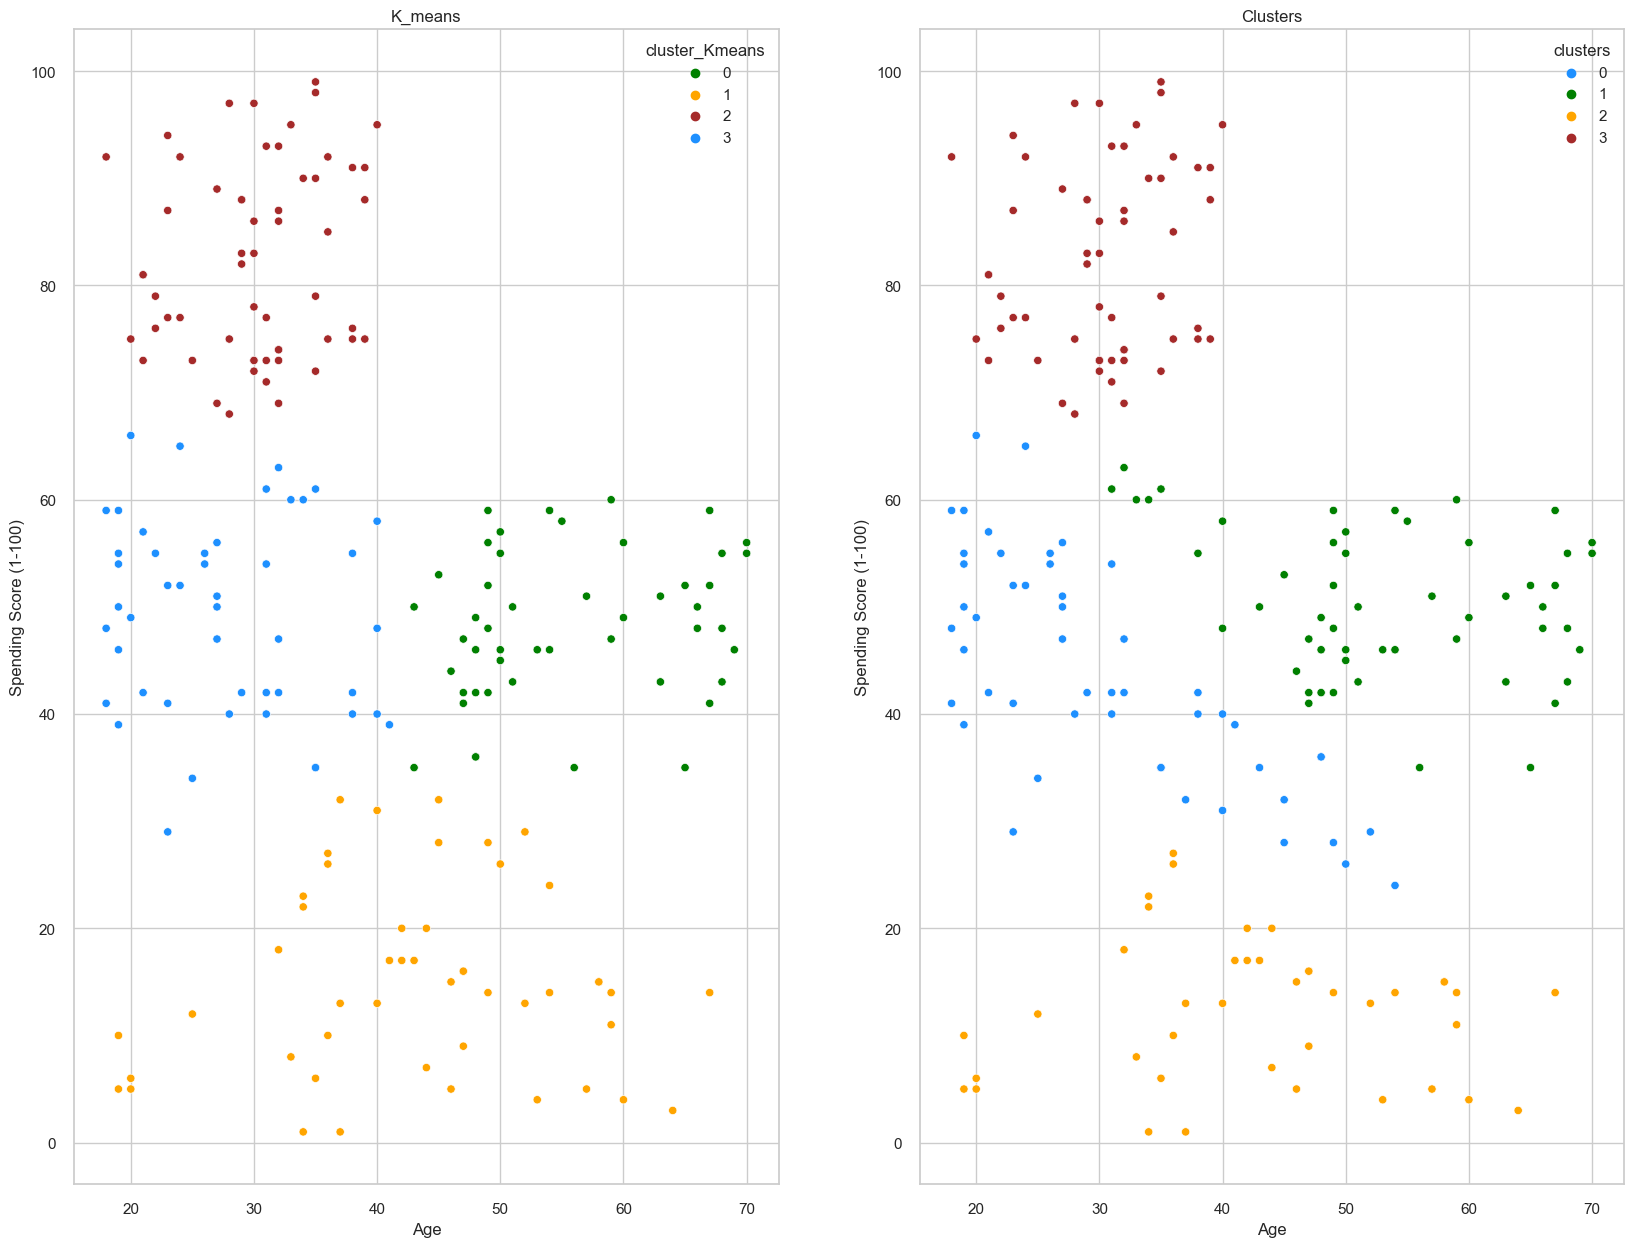

In [51]:
plt.figure(figsize = (20,15))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Kmeans', data=X,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=X,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Clusters")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

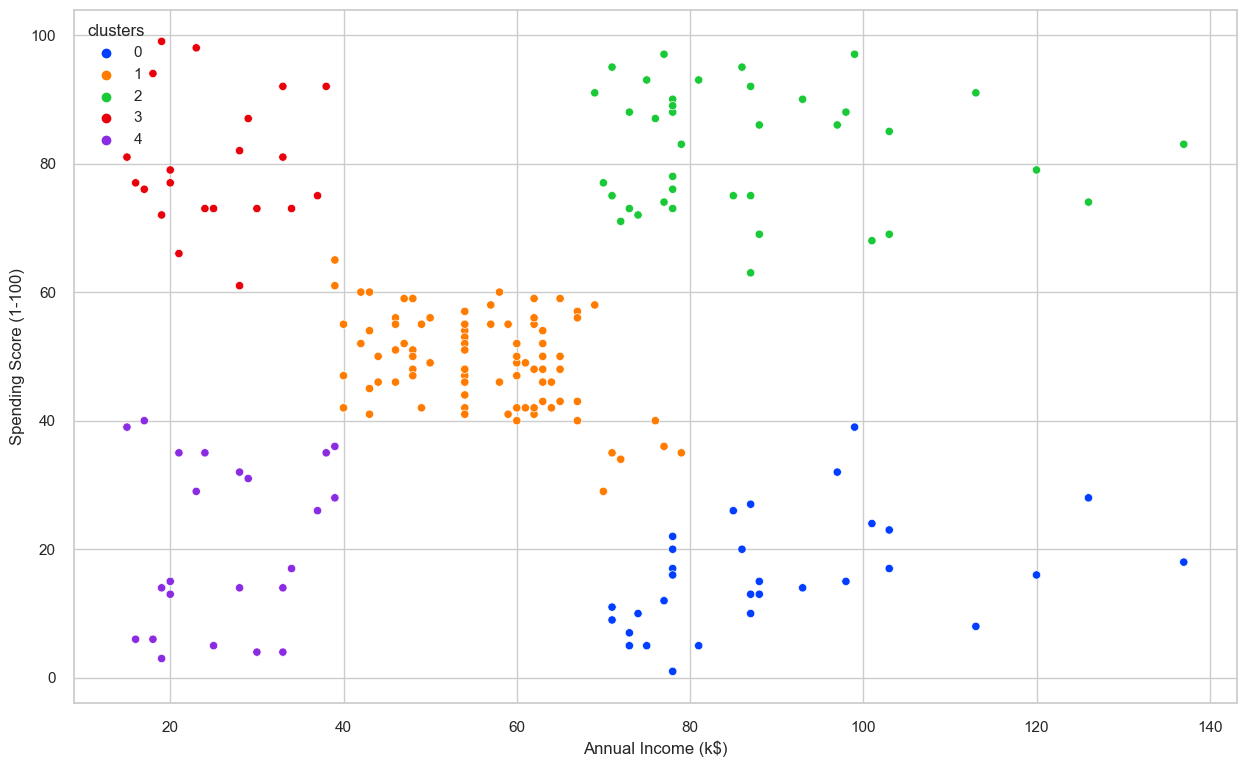

In [52]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='clusters', data=X1 ,palette="bright") 


Text(0.5, 1.0, 'clusters')

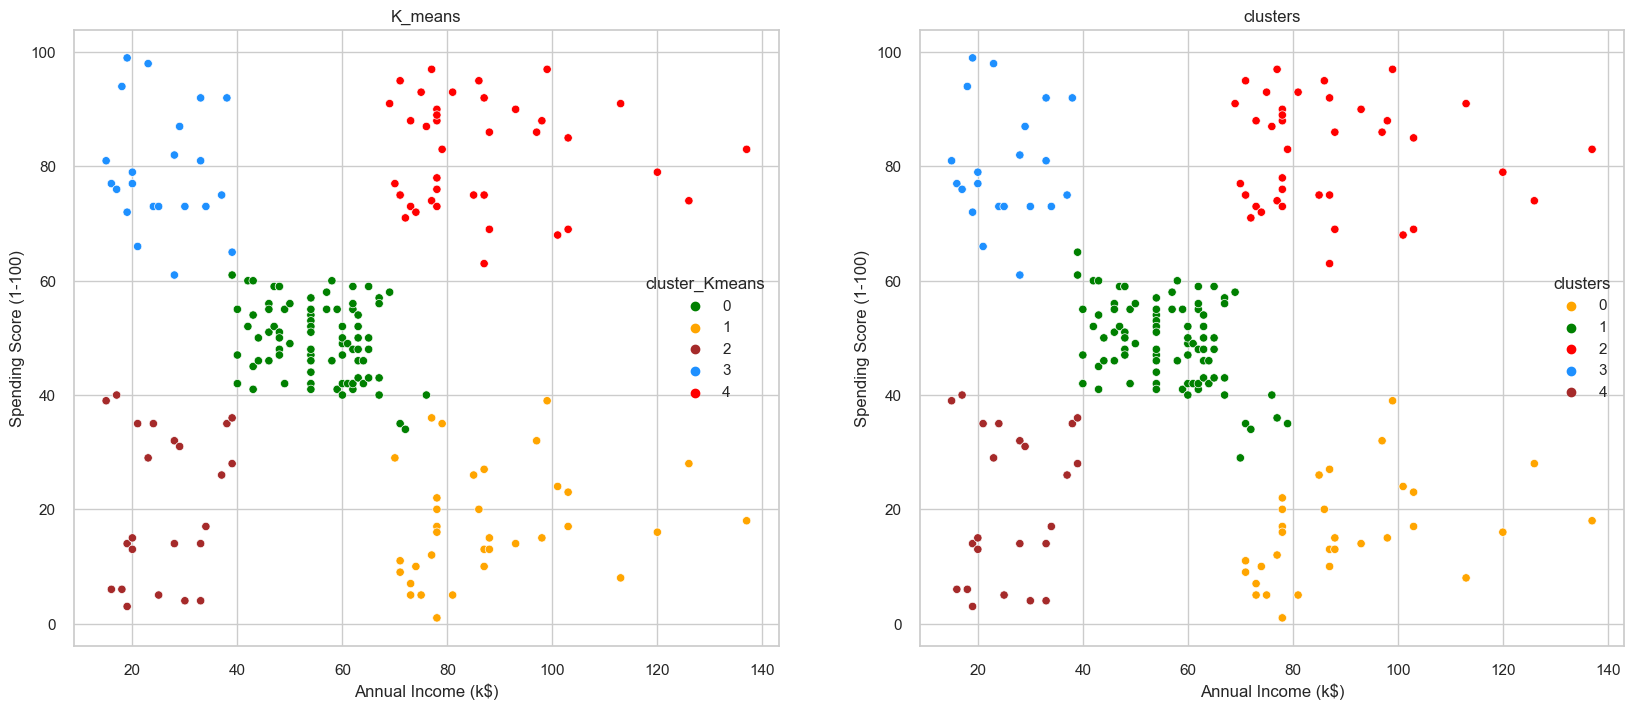

In [53]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Kmeans', data=X1, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='clusters', data=X1, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("clusters")




#### Interpretation based on Age and Spending Score- x1

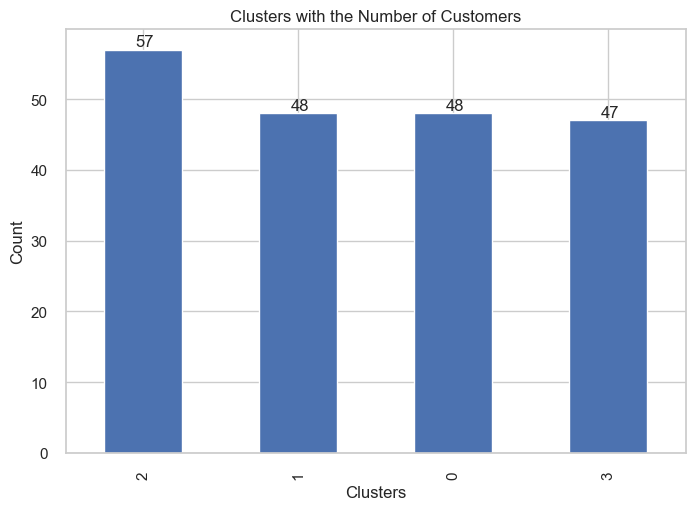

In [54]:
# Create a bar plot showing the count of customers in each cluster
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count")

# Count the number of customers in each cluster
cluster_counts = X['cluster_Kmeans'].value_counts()

ax = cluster_counts.plot(kind='bar')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.5))

plt.show()

Cluster 2 has the largest number of customers, other clusters has almost identical number of coustmors 

In [55]:
# To know age of customers and their spending score in ecah cluster
df["cluster_Age_Spending_Score"] = X.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


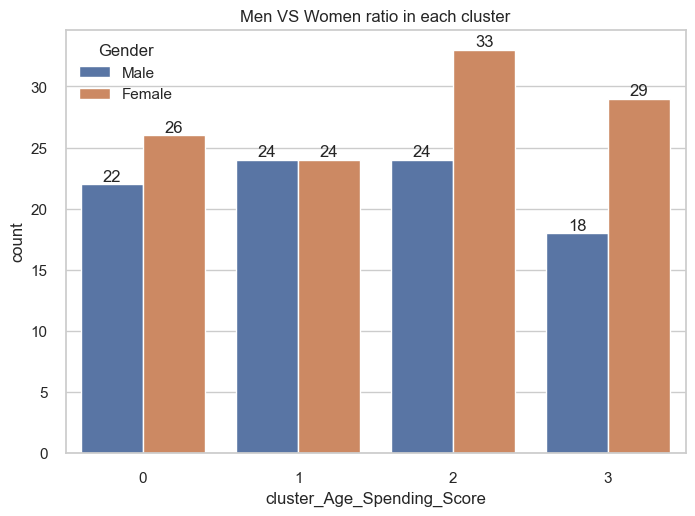

In [56]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

Female custmores numbers are always either more than males or equal to males in every cluster. 

In [57]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


<Figure size 2000x600 with 0 Axes>

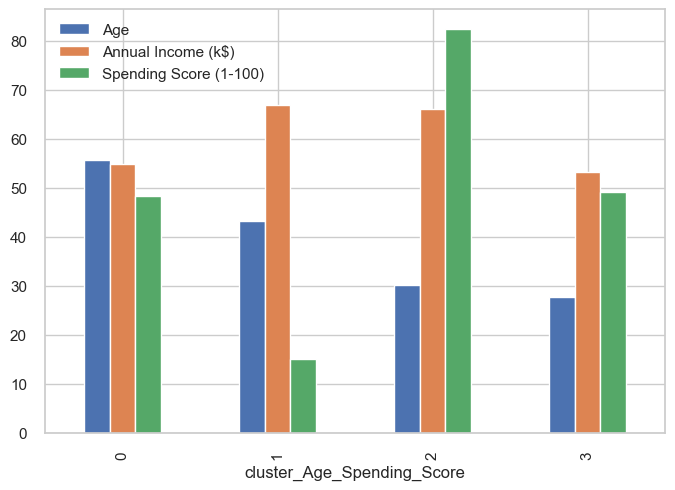

In [58]:
# Visualizing the previous table
plt.figure(figsize = (20,6))
df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar')
plt.show()

#### Interpretation based on Annual Income and Spending Score- x2

In [59]:
X1

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,clusters
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


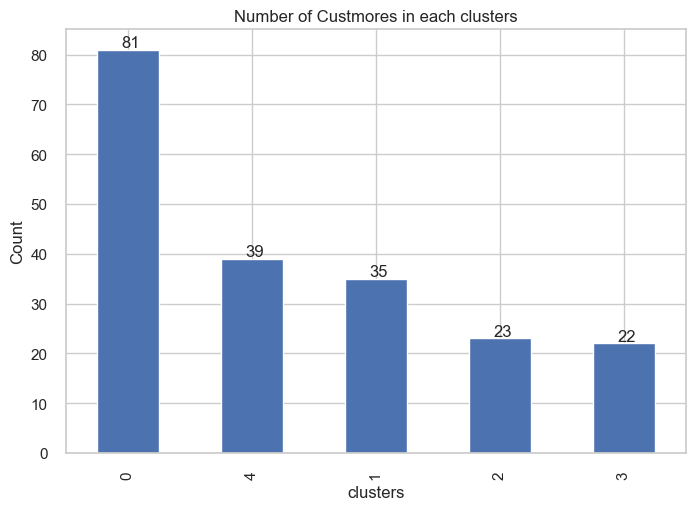

In [60]:
plt.title("Number of Custmores in each clusters")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [61]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [62]:
# We will drop cluster_Age_Spending_Score
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [63]:
df["cluster_Annual_Income_Spending_Score"] = X1.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


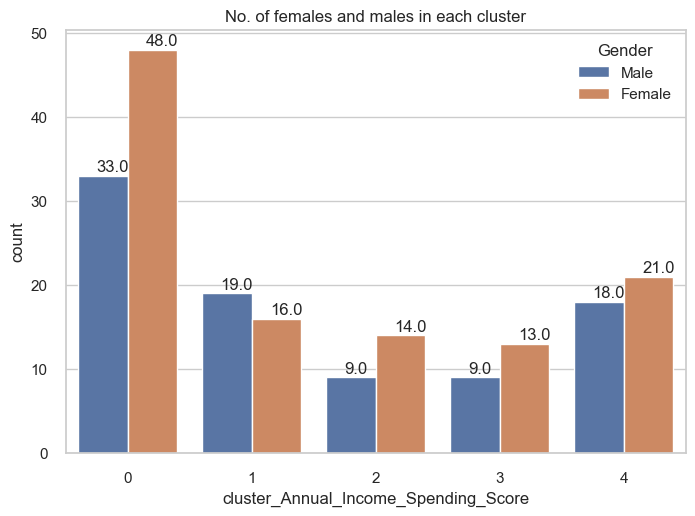

In [64]:
plt.title("No. of females and males in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [65]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
Female 0                                     40.895833           55.354167   
       1                                     43.250000           90.937500   
       2                                     43.214286           27.357143   
       3                                     25.461538           25.692308   
       4                                     32.190476           86.047619   
Male   0                                     45.363636           55.212121   
       1                                     39.315789           85.894737   
       2                                     48.333333           24.666667   
       3                                     25.000000           25.777778   
       4                                     33.277778           87.111111   

                                             Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score                          
Female 0                                                  49.000000  
       1                                                  22.062500  
       2                                                  21.714286  
       3                                                  80.538462  
       4                                                  81.666667  
Male   0                                                  50.272727  
       1                                                  12.947368  
       2                                                  19.666667  
       3                                                  77.666667  
       4                                                  82.666667

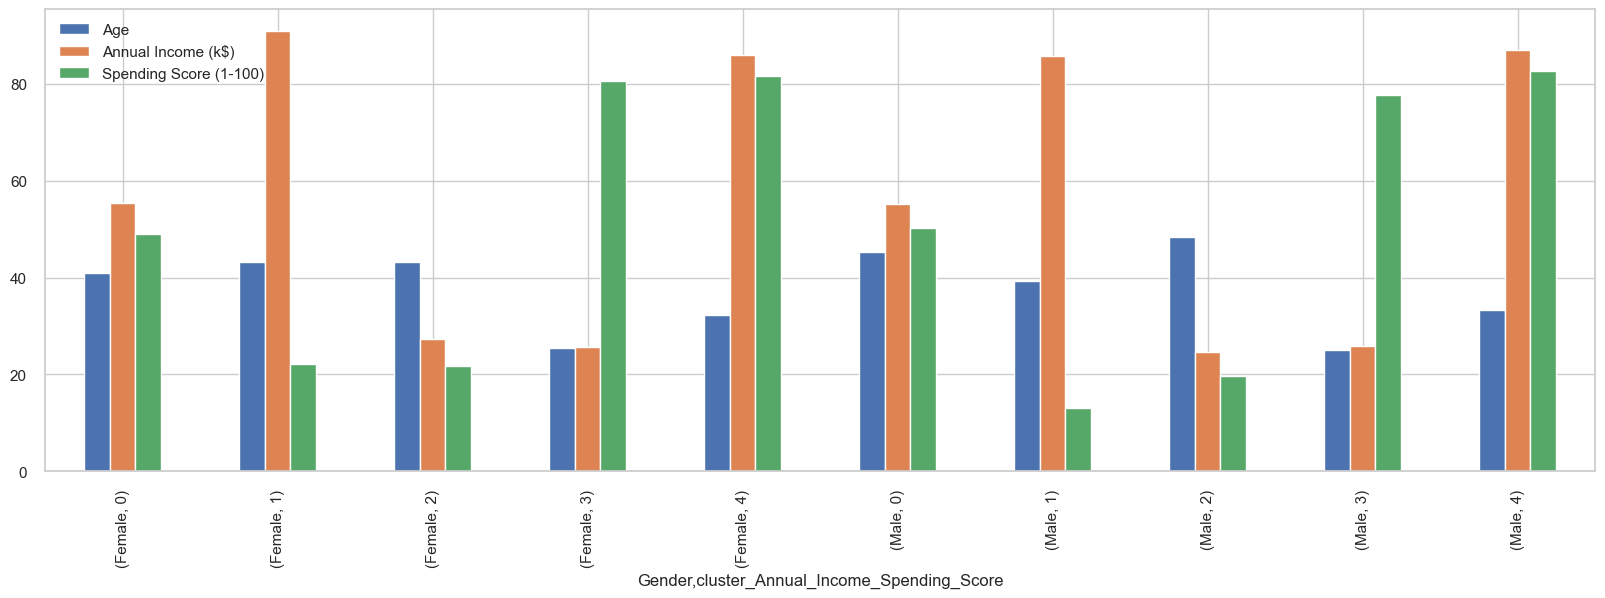

In [66]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___